In [1]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
M = pickle.load(open('Data/Chodera_data/Processed/MSM_lag1.0.pickle', 'rb'))
HMM = pickle.load(open('Data/Chodera_data/Processed/HMM_lag1.0.pickle', 'rb'))

In [5]:
M

MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=10, maxerr=1e-08, maxiter=1000000,
           reversible=True, score_k=10, score_method='VAMP2', sparse=False,
           statdist_constraint=None)

In [64]:
traj_name = 'Data/Chodera_data/Processed/otraj_lag1.0ps.npy'

In [65]:
traj = np.load(traj_name)

In [13]:
levs = M.eigenvectors_left(k=10)
revs = M.eigenvectors_right(k=10)

In [15]:
print(levs.shape)
print(revs.shape)

(10, 500)
(500, 10)


In [27]:
timescales = M.timescales(k=100)


In [50]:
robust_ts_idx = np.where(timescales>M.lag)[0] + 1
robust_ts_idx

array([1, 2, 3, 4, 5, 6, 7, 8])

In [51]:
modes = np.concatenate([levs[i][traj][:, np.newaxis] for i in robust_ts_idx], axis=1)

In [52]:
modes.shape

(500000, 8)

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_modes = scaler.fit_transform(modes)

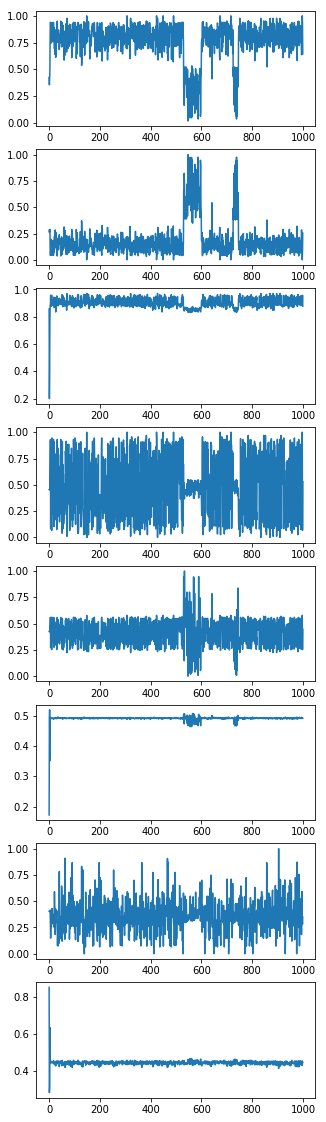

In [59]:
fig, axes = plt.subplots(scaled_modes.shape[1], figsize=(5,20))
for i, ax in enumerate(axes):
    ax.plot(scaled_modes[:1000,i])
    

In [62]:
slow_modes = scaled_modes[:,:HMM.nstates-1]
fast_modes = scaled_modes[:,HMM.nstates-1:]

array([[ 0.42344099,  0.28184698,  0.85687627],
       [ 0.35467456,  0.26091434,  0.19990363],
       [ 0.42715694,  0.27378575,  0.41510073],
       ..., 
       [ 0.75436691,  0.17533977,  0.88188343],
       [ 0.89102234,  0.10371838,  0.94641576],
       [ 0.83226073,  0.11395154,  0.86726382]])

In [66]:
np.save(traj_name.replace('otraj', 'slow_modes'), slow_modes)
np.save(traj_name.replace('otraj', 'fast_modes'), fast_modes)